<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-means evaluation lab

<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Explore-chemical-composition-data" data-toc-modified-id="Explore-chemical-composition-data-1">Explore chemical composition data</a></span><ul class="toc-item"><li><span><a href="#Select-two-of-the-features-and-plot" data-toc-modified-id="Select-two-of-the-features-and-plot-1.1">Select two of the features and plot</a></span></li><li><span><a href="#Rescale-the-data-if-needed" data-toc-modified-id="Rescale-the-data-if-needed-1.2">Rescale the data if needed</a></span></li><li><span><a href="#Produce-an-elbow-plot-and-decide-on-a-suitable-number-of-clusters" data-toc-modified-id="Produce-an-elbow-plot-and-decide-on-a-suitable-number-of-clusters-1.3">Produce an elbow plot and decide on a suitable number of clusters</a></span></li><li><span><a href="#Use-the-silhouette-score-to-determine-an-optimal-number-of-clusters" data-toc-modified-id="Use-the-silhouette-score-to-determine-an-optimal-number-of-clusters-1.4">Use the silhouette score to determine an optimal number of clusters</a></span></li><li><span><a href="#Bonus:-Color-the-points-according-to-the-assigned-labels-for-varying-numbers-of-clusters" data-toc-modified-id="Bonus:-Color-the-points-according-to-the-assigned-labels-for-varying-numbers-of-clusters-1.5">Bonus: Color the points according to the assigned labels for varying numbers of clusters</a></span></li></ul></li><li><span><a href="#Load-the-wine-dataset" data-toc-modified-id="Load-the-wine-dataset-2">Load the wine dataset</a></span><ul class="toc-item"><li><span><a href="#Pull-out-the-red-wine-column-as-a-target-variable" data-toc-modified-id="Pull-out-the-red-wine-column-as-a-target-variable-2.1">Pull out the red wine column as a target variable</a></span></li><li><span><a href="#Select-the-other-variables-to-use-for-clustering" data-toc-modified-id="Select-the-other-variables-to-use-for-clustering-2.2">Select the other variables to use for clustering</a></span></li><li><span><a href="#Rescale-if-needed" data-toc-modified-id="Rescale-if-needed-2.3">Rescale if needed</a></span></li><li><span><a href="#Produce-an-elbow-plot-and-decide-on-a-suitable-number-of-clusters" data-toc-modified-id="Produce-an-elbow-plot-and-decide-on-a-suitable-number-of-clusters-2.4">Produce an elbow plot and decide on a suitable number of clusters</a></span></li><li><span><a href="#Use-the-silhouette-score-to-determine-an-optimal-number-of-clusters" data-toc-modified-id="Use-the-silhouette-score-to-determine-an-optimal-number-of-clusters-2.5">Use the silhouette score to determine an optimal number of clusters</a></span></li><li><span><a href="#Bonus:-Color-the-points-according-to-the-assigned-labels-for-varying-numbers-of-clusters" data-toc-modified-id="Bonus:-Color-the-points-according-to-the-assigned-labels-for-varying-numbers-of-clusters-2.6">Bonus: Color the points according to the assigned labels for varying numbers of clusters</a></span></li><li><span><a href="#Fit-a-KMeans-model-with-K=2-and-extract-the-predicted-labels" data-toc-modified-id="Fit-a-KMeans-model-with-K=2-and-extract-the-predicted-labels-2.7">Fit a KMeans model with K=2 and extract the predicted labels</a></span></li><li><span><a href="#Calculate-the-homogeneity,-completeness-and-V-measure-score" data-toc-modified-id="Calculate-the-homogeneity,-completeness-and-V-measure-score-2.8">Calculate the homogeneity, completeness and V-measure-score</a></span></li></ul></li></ul></div>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings 
warnings.simplefilter('ignore')

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import homogeneity_completeness_v_measure, homogeneity_score, completeness_score, v_measure_score
from scikitplot.metrics import plot_silhouette
from scikitplot.cluster import plot_elbow_curve

## Explore chemical composition data


Let's load in a dataset on chemical composition and plot the silhouette scores for different numbers of clusters.

In [34]:
from statsmodels.datasets import get_rdataset

In [35]:
data = get_rdataset('chorSub', package='cluster')
data.keys()

dict_keys(['data', '__doc__', 'package', 'title', 'from_cache'])

In [36]:
print(data.__doc__)

+---------+-----------------+
| chorSub | R Documentation |
+---------+-----------------+

Subset of C-horizon of Kola Data
--------------------------------

Description
~~~~~~~~~~~

This is a small rounded subset of the C-horizon data ``chorizon`` from
package mvoutlier.

Usage
~~~~~

::

   data(chorSub)

Format
~~~~~~

A data frame with 61 observations on 10 variables. The variables contain
scaled concentrations of chemical elements.

Details
~~~~~~~

This data set was produced from ``chorizon`` via these statements:

::

       data(chorizon, package = "mvoutlier")
       chorSub <- round(100*scale(chorizon[,101:110]))[190:250,]
       storage.mode(chorSub) <- "integer"
       colnames(chorSub) <- gsub("_.*", '', colnames(chorSub))
     

Source
~~~~~~

Kola Project (1993-1998)

See Also
~~~~~~~~

``chorizon`` in package mvoutlier and other Kola data in the same
package.

Examples
~~~~~~~~

::

   data(chorSub)
   summary(chorSub)
   pairs(chorSub, gap= .1)# some outliers



In [37]:
df = data.data
df.head()

,Al,Ca,Fe,K,Mg,Mn,Na,P,Si,Ti
190,101,11,-22,-17,-34,-41,27,-36,-58,-28
191,50,129,23,-82,47,33,61,90,-24,9
192,5,65,-22,-96,-33,7,47,49,30,-39
193,-40,-16,-158,-70,-104,-114,53,-61,103,-160
194,-13,30,-82,-113,26,-41,65,-90,43,-130


### Select two of the features and plot

In [38]:
two = pd.DataFrame(df[["K","Na"]])

In [39]:
two.head()

,K,Na
190,-17,27
191,-82,61
192,-96,47
193,-70,53
194,-113,65


In [40]:
two_2 = pd.DataFrame(df[["Fe","Mg"]])

In [41]:
X=two_2

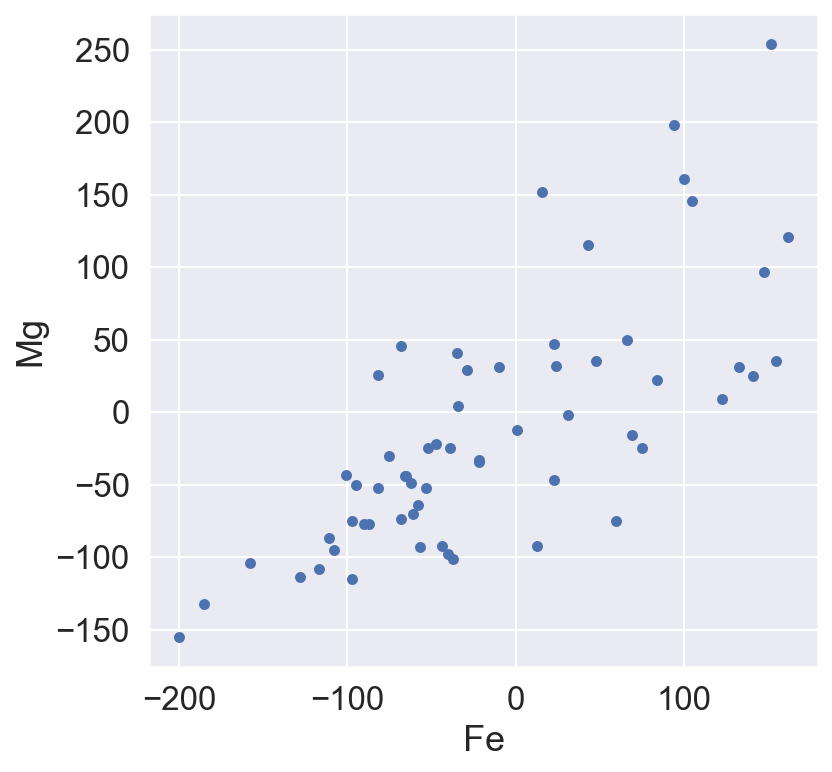

In [42]:
X.plot(kind="scatter", x="Fe", y="Mg", c='b', figsize=(6, 6))
plt.show()


### Rescale the data if needed

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [45]:
from sklearn.cluster import KMeans

In [46]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(Xstd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [47]:
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)


Assigned cluster labels: 
 [0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0]


In [48]:
centroids = model.cluster_centers_
Xstd["clusters"] = cluster_labels
print(centroids)
print(Xstd)

[[-0.59269054 -0.5327179 ]
 [ 1.12893436  1.01470076]]
          Fe        Mg  clusters
0  -0.083517 -0.249122         0
1   0.427074  0.714033         1
2  -0.083517 -0.237231         0
3  -1.626638 -1.081479         0
4  -0.764306  0.464326         0
5   0.517846  0.131384         1
6  -0.287754 -1.010134         0
7   1.675186  0.523780         1
8  -0.582762 -0.368030         0
9   1.357485  1.891223         1
10  0.427074 -0.403703         0
11  1.924809  0.571344         1
12 -0.491991 -0.605846         0
13 -0.333140 -0.938789         0
14 -0.934503 -1.212278         0
15 -0.253715 -1.045806         0
16  1.017091 -0.142105         1
17 -0.855078 -0.760427         0
18  1.890769  3.175430         1
19 -0.821038 -0.760427         0
20 -0.979889 -0.356139         0
21  2.004234  1.593953         1
22  0.846893 -0.736645         0
23  0.654003  1.522608         1
24 -0.219675  0.202729         0
25 -0.571416 -0.368030         0
26  1.232674  2.509545         1
27 -0.911810 -0.43937

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


ValueError: 'c' argument has 3 elements, which is not acceptable for use with 'x' with size 2, 'y' with size 2.

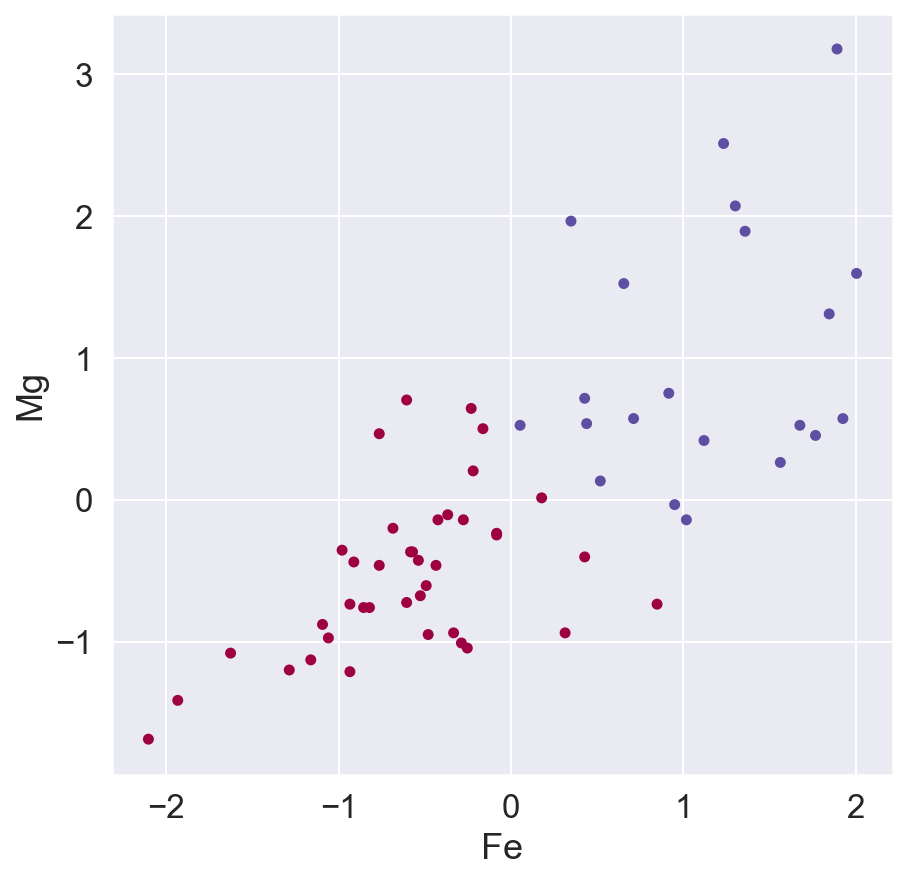

In [49]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
Xstd.plot(x="Fe", y="Mg", kind="scatter", c=Xstd['clusters'], colormap='Spectral', ax=ax, colorbar=False)
ax.scatter(centroids[:,0], centroids[:,1], marker='o', s=150, alpha=.7, c=range(0,3), 
            cmap='Spectral')
plt.show()


### Produce an elbow plot and decide on a suitable number of clusters

In [ ]:
model.inertia_

In [ ]:
from scikitplot.cluster import plot_elbow_curve

In [ ]:
plot_elbow_curve(model, Xstd, cluster_ranges=range(1, 11))
plt.show()


### Use the silhouette score to determine an optimal number of clusters

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs


In [51]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
clusters = kmeans.fit(Xstd)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


In [52]:
silhouette_score(X, labels)


0.46245138521961315

number of clusters:  2


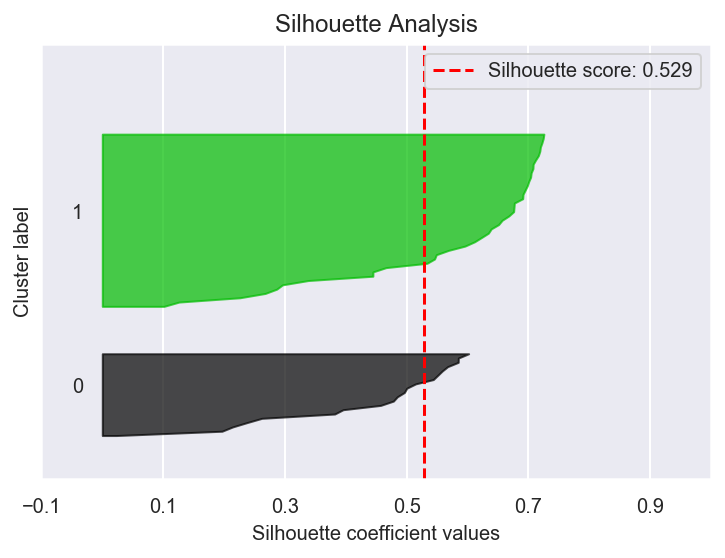

number of clusters:  3


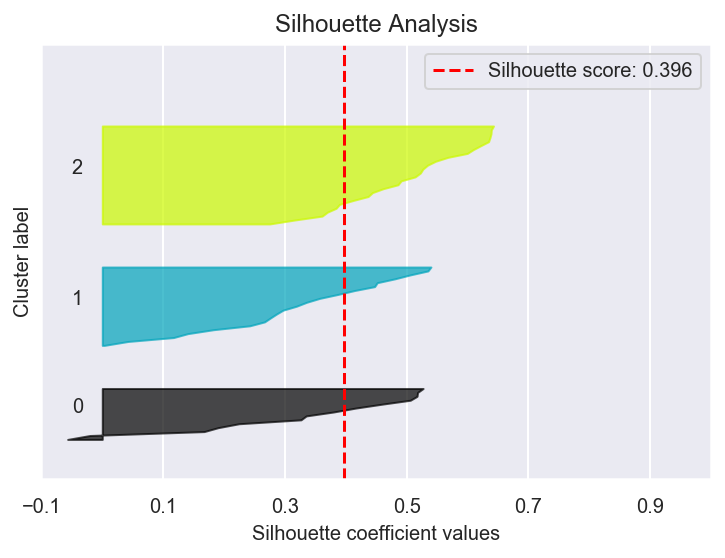

number of clusters:  4


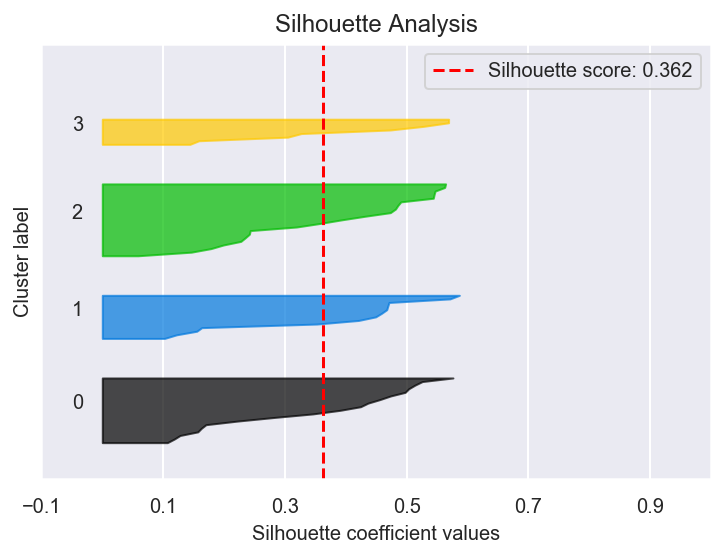

number of clusters:  5


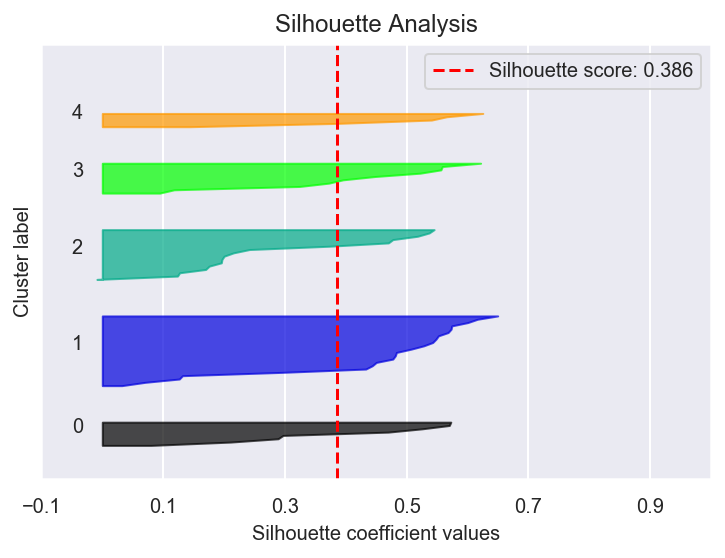

In [53]:
from scikitplot.metrics import plot_silhouette
for k in range(2, 6):
    print('number of clusters: ', k)
    model = KMeans(n_clusters=k)
    model.fit(X)
    labels = model.labels_
    plot_silhouette(X, labels)
    plt.show()


In [54]:
from sklearn.metrics import homogeneity_completeness_v_measure
homogeneity_completeness_v_measure(y, labels)


ValueError: labels_true and labels_pred must have same size, got 6497 and 61

### Bonus: Color the points according to the assigned labels for varying numbers of clusters

## Load the wine dataset

In [ ]:
wine = pd.read_csv('../../../../resource-datasets/wine_data/winequality_merged.csv')
wine.head(10)

### Pull out the red wine column as a target variable

We want to compare the clustering based on the other variables against this existing label.

In [ ]:
y = wine.pop("red_wine")

### Select the other variables to use for clustering

In [55]:
X= wine

In [56]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Rescale if needed

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



In [59]:
from sklearn.cluster import KMeans


In [60]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(Xstd)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [61]:
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)


Assigned cluster labels: 
 [0 0 0 ... 1 1 1]


In [62]:
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)


Location of centroids: 
[[ 0.82041347  1.15883394 -0.33683906 -0.58971357  0.90712156 -0.83245391
  -1.17433482  0.67068494  0.55554032  0.82430903 -0.08642469 -0.28085156]
 [-0.28338159 -0.40027646  0.11634863  0.20369481 -0.3133317   0.28754051
   0.40563067 -0.23166339 -0.19189092 -0.28472716  0.02985222  0.09700981]]


In [63]:
Xstd['clusters'] = cluster_labels
Xstd.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,0
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,0


from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
Xstd.plot(x="X", y="y", kind="scatter", c=Xstd['clusters'], colormap='Spectral', ax=ax, colorbar=False)
ax.scatter(centroids[:,0], centroids[:,1], marker='o', s=150, alpha=.7, c=range(0,3), 
            cmap='Spectral')
plt.show()


In [64]:
model.inertia_


62487.486338984054

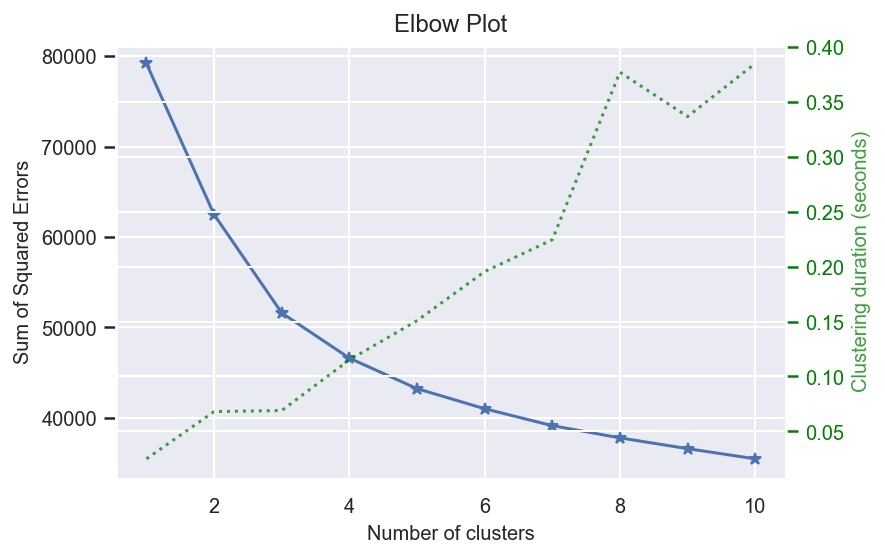

In [65]:
from scikitplot.cluster import plot_elbow_curve
plot_elbow_curve(model, Xstd, cluster_ranges=range(1, 11))
plt.show()


### Produce an elbow plot and decide on a suitable number of clusters

### Use the silhouette score to determine an optimal number of clusters

In [66]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
clusters = kmeans.fit(Xstd)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


number of clusters:  2


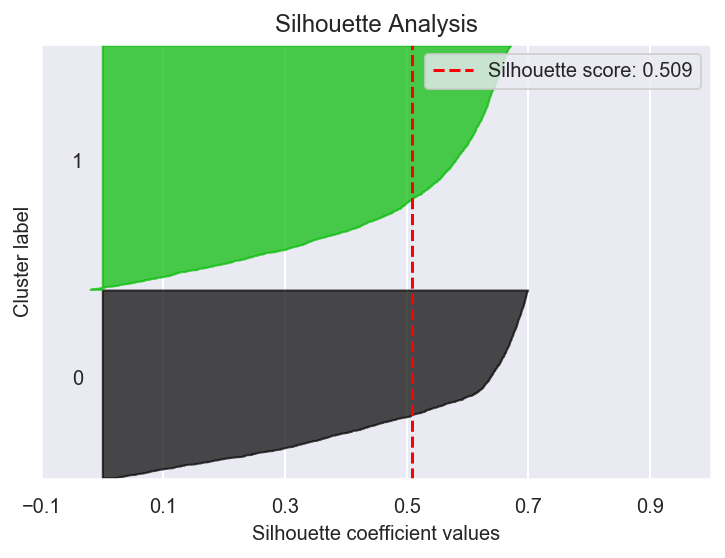

number of clusters:  3


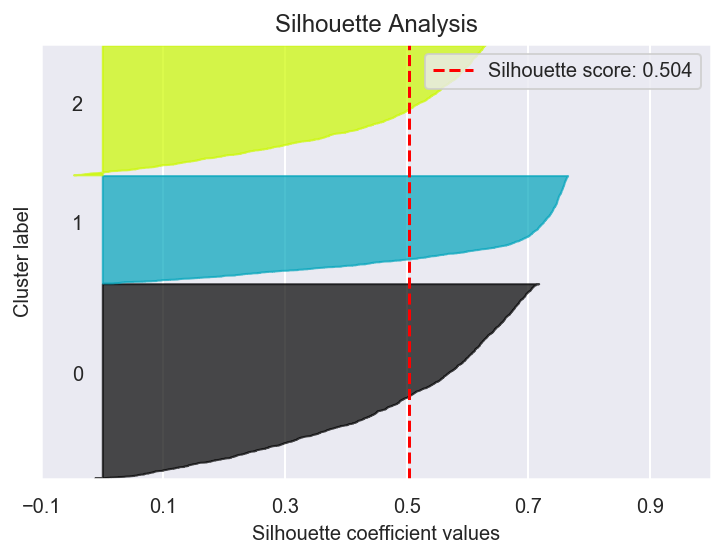

number of clusters:  4


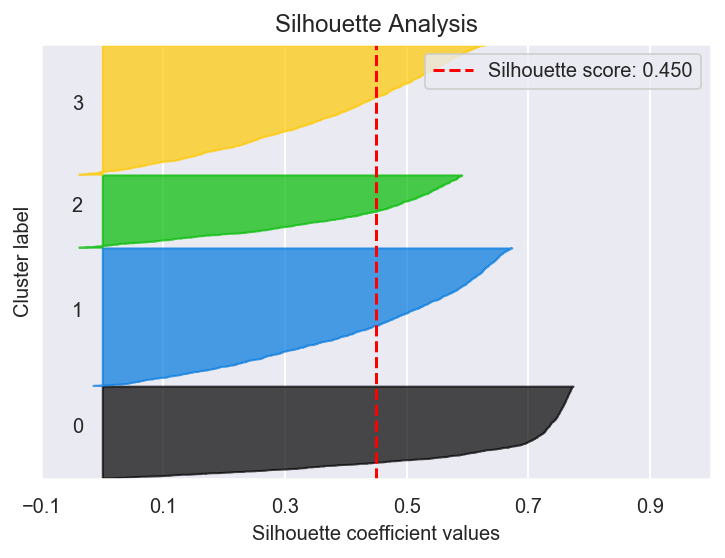

number of clusters:  5


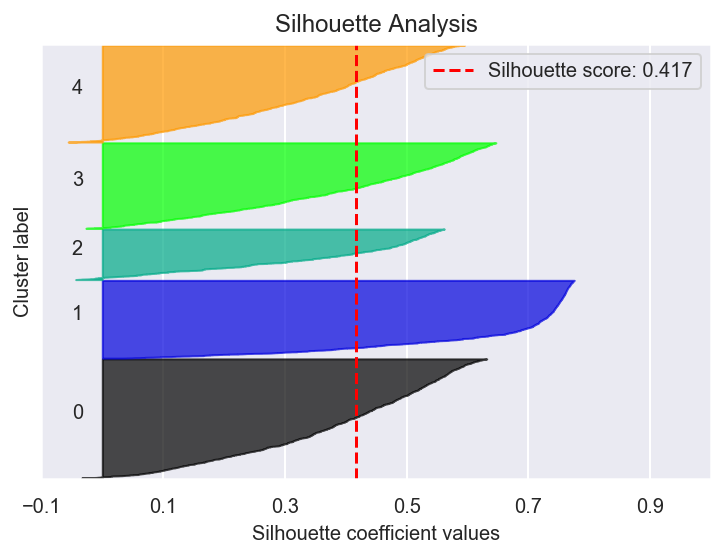

In [67]:

from scikitplot.metrics import plot_silhouette
for k in range(2, 6):
    print('number of clusters: ', k)
    model = KMeans(n_clusters=k)
    model.fit(X)
    labels = model.labels_
    plot_silhouette(X, labels)
    plt.show()


### Bonus: Color the points according to the assigned labels for varying numbers of clusters

### Fit a KMeans model with K=2 and extract the predicted labels

In [68]:
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)


Assigned cluster labels: 
 [1 3 1 ... 0 0 3]


### Calculate the homogeneity, completeness and V-measure-score

In [69]:
from sklearn.metrics import homogeneity_completeness_v_measure
homogeneity_completeness_v_measure(y, labels)


(0.5792006628162469, 0.2053676882277226, 0.30322176770006115)